In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading csv file
beer_df = pd.read_csv('beer_data.csv')
beer_df.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [3]:
# attributes of dataset
print("Shape of dataset : ",beer_df.shape)
print("Info of dataset :")
beer_df.info()

Shape of dataset :  (475984, 3)
Info of dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [4]:
beer_df.head(5)

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [5]:
beer_df.tail(5)

,beer_beerid,review_profilename,review_overall
475979,48360,WesWes,4.5
475980,48360,Slatetank,4.0
475981,33061,asabreed,4.0
475982,33061,PopeDX,5.0
475983,33061,TongoRad,4.5


#### <font color=red>We have dataset with 475984 rows and threes columns which corresponds to Beer ID, Reviewer Name, Rating received by beer from respective reviewer</font>

# <font color=Blue>Data preparation</font>

### NULL Value check
#### We will  check for NULL values in dataset

In [6]:
# Null value check
beer_df.isnull().sum(axis=0)

beer_beerid             0
review_profilename    100
review_overall          0
dtype: int64

#### <font color=red>We have 100 rows which have "review_profilename" field as NULL. We will drop these rows since we do not have any mechanism to resolve these NULL values</font>

In [7]:
beer_df = beer_df.dropna()

In [8]:
print("Shape of dataset : ",beer_df.shape)
print("Info of dataset :")
beer_df.info()

Shape of dataset :  (475884, 3)
Info of dataset :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 475884 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475884 non-null int64
review_profilename    475884 non-null object
review_overall        475884 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


#### <font color=red>After treating NULL values we are left with 475884 records</font>

In [9]:
# NULL value check after dropping
beer_df.isnull().sum(axis=0)

beer_beerid           0
review_profilename    0
review_overall        0
dtype: int64

### Duplicate records check
#### We are going to check for records where user has reviewed same beer twice or more.

In [10]:
# Checking for duplicate values, we will consider pair of beer_beeris, review_profilename for duplicate check
beer_df.duplicated(['beer_beerid', 'review_profilename']).sum()

1422

#### <font color=red>We have around 1422 duplicated records, we are going to consider first record in these and drop consecutive duplicated records </font>

In [11]:
beer_df.drop_duplicates(subset = ['beer_beerid', 'review_profilename'], inplace = True, keep = 'first')

In [12]:
print("Shape of dataset : ",beer_df.shape)
print("Info of dataset :")
beer_df.info()

Shape of dataset :  (474462, 3)
Info of dataset :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 474462 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           474462 non-null int64
review_profilename    474462 non-null object
review_overall        474462 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


#### <font color = red>After treating duplicated records we are left with 474462 records</font>

### Finding N, where N is least number of reviews that beer needs to have for consideration in our analysis
To find optimal N we are going to spread number of beers against review received
To achieve this first we will find number of review against each beer and than find number of beer against each review count

In [13]:
beer_N = pd.DataFrame(beer_df.beer_beerid.value_counts())
beer_N.columns = ['rating_count']
beer_N['beer_beerid'] = beer_N.index
beer_N.reset_index(drop=True, inplace=True)
beer_N.head()

,rating_count,beer_beerid
0,977,2093
1,966,412
2,902,1904
3,840,1093
4,812,92


In [14]:
beer_N.shape

(40304, 2)

In [15]:
beer_N.rating_count.describe(percentiles = [.1,.2,.3,.4,.5,.6,.7,.8,.85,.9,.93,.95,.97,.99])

count    40304.000000
mean        11.772082
std         41.888449
min          1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          2.000000
60%          2.000000
70%          4.000000
80%          7.000000
85%         12.000000
90%         21.000000
93%         34.000000
95%         51.000000
97%         86.000000
99%        195.000000
max        977.000000
Name: rating_count, dtype: float64

#### we have total 40304 different Beer IDs which have received total of 474462 ratings from different user, which is also total number of records we have now.
    Maximum number of rating received by a beer is 977
    40% beers have only 1 rating
    Approximately around 95% have 50 ratings or less.

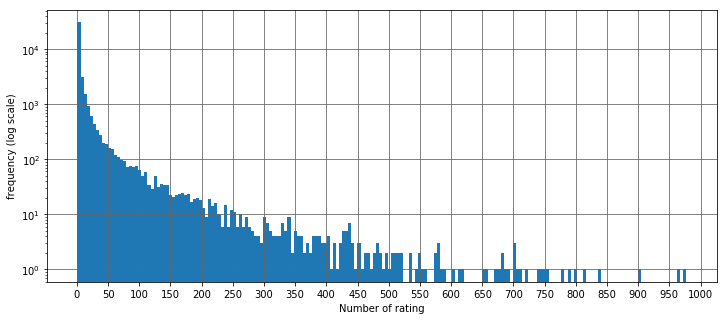

In [16]:
fig = plt.figure(figsize=(12,5))

plt.hist(beer_N.rating_count, bins=200)
plt.yscale('log')
plt.ylabel('frequency (log scale)')
plt.xlabel('Number of rating')
plt.xticks(np.arange(0,1050,50))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

#### From the plot we can see majority of beers have received rating 50 or less.

In [17]:
# Number of beer which received review 50 or less
print('Number of beers that received rating 50 or less : ',len(beer_N[beer_N.rating_count <= 50]))
print('Number of records with beers that received rating 50 or less : ',sum(beer_N.rating_count[beer_N.rating_count <= 50]))

Number of beers that received rating 50 or less :  38276
Number of records with beers that received rating 50 or less :  180265


#### Number of beers that received rating 50 or less is 38276 which is appx. 95% of total beer ids which is 40304
#### Beers with rating 50 or less govern 180265 records which is appx. 38% of total records 474462

#### <font color=red>Based on this analysis we can consider N to be 51 which is least number of reviews for a beer to be considered in our analysis. With N as 51 we are going to consider 5% of total beers and 62% of total records, which is fair enough count to proceed further in analysis.</font>

#### Filtering dataset to have only beer ids which have received atleast 51 reviews

In [18]:
# Filtering
beer_data = beer_df[beer_df.beer_beerid.isin(beer_N.beer_beerid[beer_N.rating_count >= 51])]

In [19]:
print("Shape of filtered dataset :",beer_data.shape)

Shape of filtered dataset : (294197, 3)


In [20]:
print("Unique beer IDs :", beer_data.beer_beerid.nunique())

Unique beer IDs : 2028


In [21]:
print("Unique reviewers : ", beer_data.review_profilename.nunique())

Unique reviewers :  19447


#### <font color=red>In filtered dataset we got total records 294197 with 2028 unique beer IDs and 19447 unique reviewers</font>

# <font color=blue>Data Exploration</font>

## Unique value of ratings

In [22]:
beer_data['review_overall'].value_counts().sort_index()

1.0      1682
1.5      1873
2.0      5987
2.5      9038
3.0     26895
3.5     51606
4.0    110316
4.5     66724
5.0     20076
Name: review_overall, dtype: int64

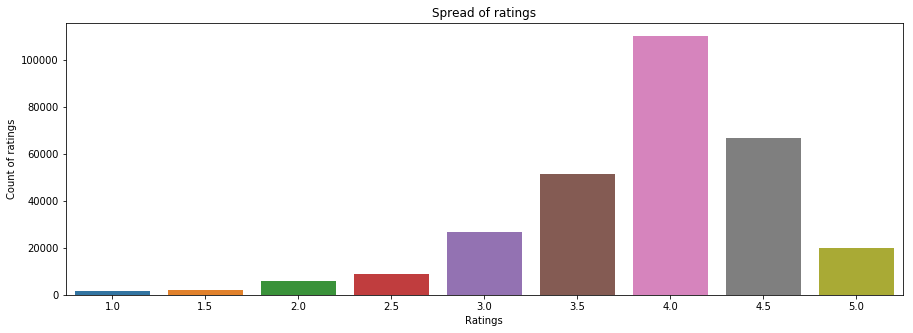

In [23]:
# Plotting unique average rating vs frequency
plt.figure(figsize = (15,5))
plt.title('Spread of ratings')

x_data = beer_data.groupby('review_overall').count()[['beer_beerid']].reset_index().review_overall
y_data = beer_data.groupby('review_overall').count()[['beer_beerid']].reset_index().beer_beerid

ax = sns.barplot(x_data, y_data)
#sns.set_context("paper", font_scale=1.2)
ax.set(xlabel="Ratings", ylabel = "Count of ratings")
plt.show()

#### <font color=red>Maximum number of rating choosen by reviewers is 4.0 followed by 4.5</font>

## Average beer ratings

In [24]:
# calculating average rating received by each beer
beer_rating = pd.DataFrame(beer_data[['beer_beerid','review_overall']].groupby(['beer_beerid']).agg([pd.Series.count, np.mean]))
beer_rating.columns = ['Rating_count', 'Rating_average']
beer_rating['beer_beerid'] = beer_rating.index
beer_rating.reset_index(drop=True, inplace= True)
beer_rating.sort_values(by='Rating_average', ascending = False, inplace = True)
beer_rating.head()

,Rating_count,Rating_average,beer_beerid
1119,136.0,4.650735,16814
495,413.0,4.622276,1545
1217,185.0,4.608108,21690
974,778.0,4.596401,7971
1778,179.0,4.586592,47658


In [25]:
beer_rating.Rating_average.describe()

count    2028.000000
mean        3.820188
std         0.350447
min         1.425676
25%         3.670910
50%         3.875000
75%         4.049564
max         4.650735
Name: Rating_average, dtype: float64

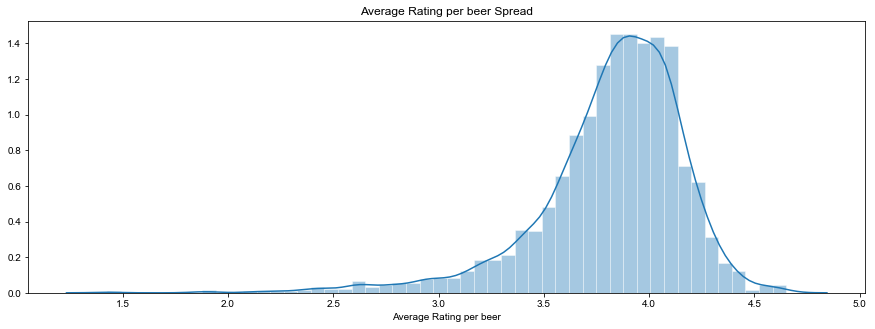

In [26]:
plt.figure(figsize = (15,5))
plt.title('Average Rating per beer Spread')
sns.set()
ax = sns.distplot(beer_rating.Rating_average)
ax.set(xlabel="Average Rating per beer")
plt.show()

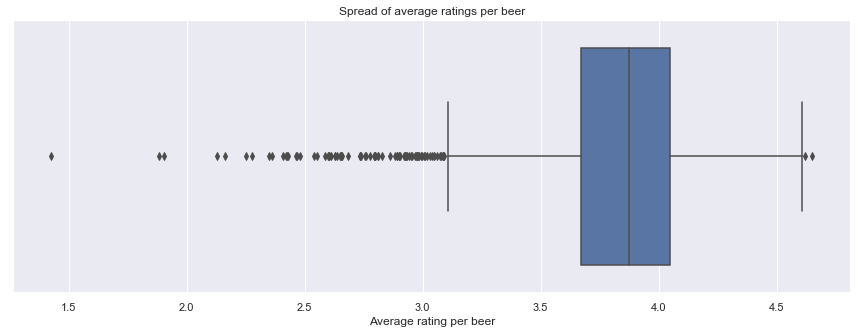

In [27]:
plt.figure(figsize = (15,5))
plt.title('Spread of average ratings per beer')

ax = sns.boxplot(x=beer_rating.Rating_average)
#sns.set_context("paper", font_scale=1.2)
ax.set(xlabel="Average rating per beer")
plt.show()

#### <font color=red>Median and Mean value of average ratings per beer is almost same at 3.8</font>
#### <font color=red>Majority of beers received average rating between 3.6 to 4</font>

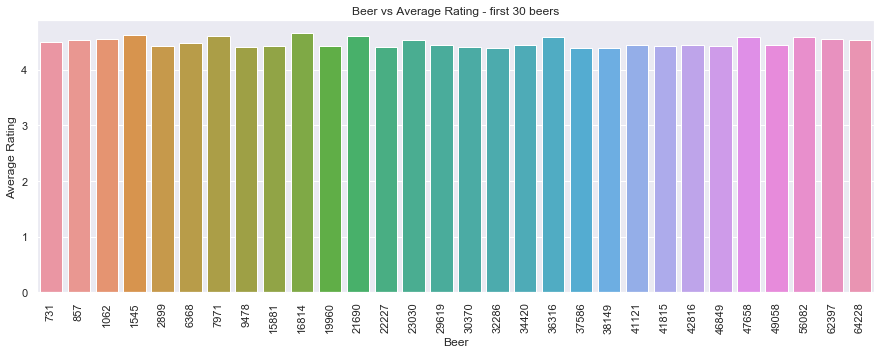

In [28]:
# average user ratings for first 30 beers
plt.figure(figsize = (15,5))
plt.title("Beer vs Average Rating - first 30 beers")
sns.barplot(x = 'beer_beerid', y = 'Rating_average', data = beer_rating.head(30))
plt.xlabel("Beer") 
plt.ylabel("Average Rating")
plt.xticks(rotation = 'vertical')
plt.show()

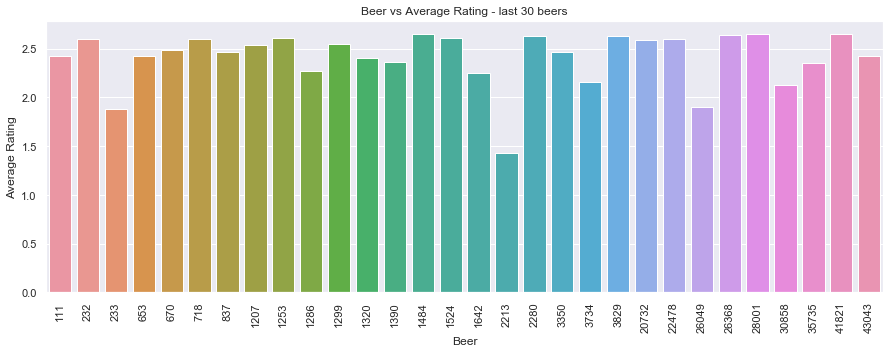

In [29]:
# average user ratings for last 30 beers
plt.figure(figsize = (15,5))
plt.title("Beer vs Average Rating - last 30 beers")
sns.barplot(x = 'beer_beerid', y = 'Rating_average', data = beer_rating.tail(30))
plt.xlabel("Beer") 
plt.ylabel("Average Rating")
plt.xticks(rotation = 'vertical')
plt.show()

## Average number of ratings given to beer

In [30]:
beer_rating.sort_values(by='Rating_count', ascending = False, inplace = True)
beer_rating.Rating_count.describe()

count    2028.000000
mean      145.067554
std       122.624804
min        51.000000
25%        69.000000
50%       100.000000
75%       170.000000
max       977.000000
Name: Rating_count, dtype: float64

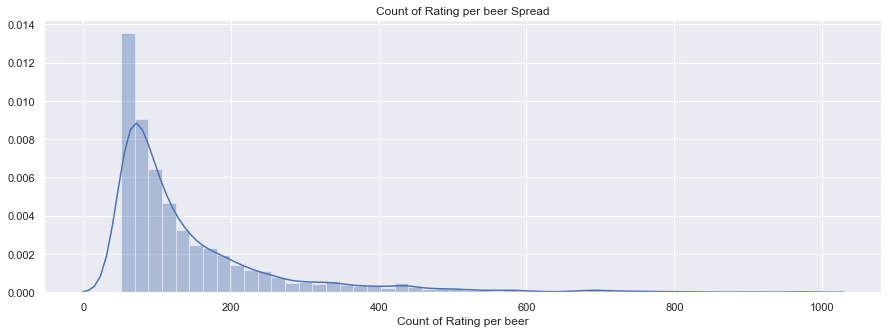

In [31]:
plt.figure(figsize = (15,5))
plt.title('Count of Rating per beer Spread')
sns.set()
ax = sns.distplot(beer_rating.Rating_count)
ax.set(xlabel="Count of Rating per beer")
plt.show()

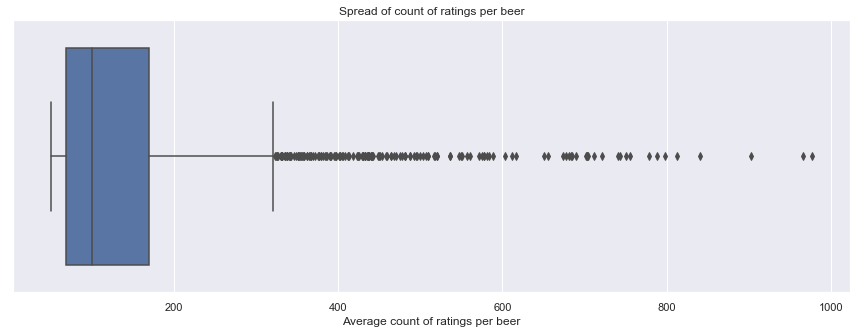

In [32]:
plt.figure(figsize = (15,5))
plt.title('Spread of count of ratings per beer')

ax = sns.boxplot(x=beer_rating.Rating_count)
#sns.set_context("paper", font_scale=1.2)
ax.set(xlabel="Average count of ratings per beer")
plt.show()

#### <font color=red>Median and Mean value of average rating count per beer has a good differen with mean at 145 and median at 100.</font>
#### <font color=red>Majority of beers received rating between 69 to 170</font>

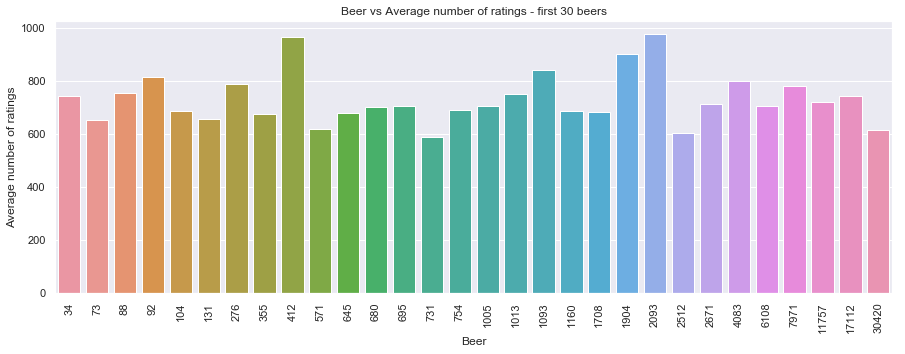

In [33]:
# average user ratings for first 30 beers
plt.figure(figsize = (15,5))
plt.title("Beer vs Average number of ratings - first 30 beers")
sns.barplot(x = 'beer_beerid', y = 'Rating_count', data = beer_rating.head(30))
plt.xlabel("Beer") 
plt.ylabel("Average number of ratings")
plt.xticks(rotation = 'vertical')
plt.show()

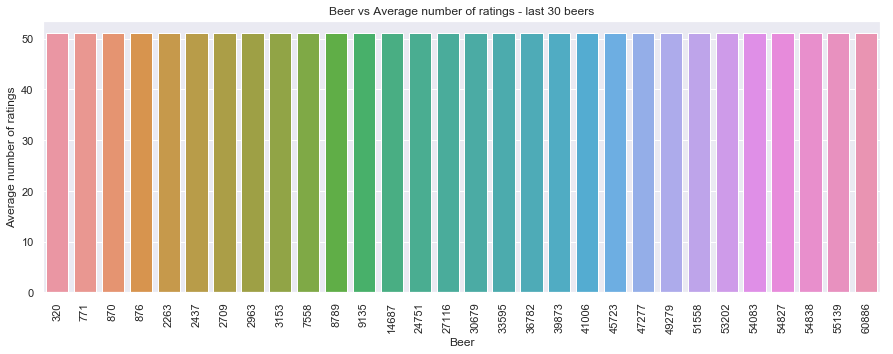

In [34]:
# average user ratings for last 30 Beers
plt.figure(figsize = (15,5))
plt.title("Beer vs Average number of ratings - last 30 beers")
sns.barplot(x = 'beer_beerid', y = 'Rating_count', data = beer_rating.tail(30))
plt.xlabel("Beer") 
plt.ylabel("Average number of ratings")
plt.xticks(rotation = 'vertical')
plt.show()

## Average user ratings

In [35]:
# calculating average rating received by each beer
user_rating = pd.DataFrame(beer_data[['review_profilename','review_overall']].groupby(['review_profilename']).agg([pd.Series.count, np.mean]))
user_rating.columns = ['Rating_count', 'Rating_average']
user_rating['review_profilename'] = user_rating.index
user_rating.reset_index(drop=True, inplace= True)
user_rating.sort_values(by='Rating_average', ascending = False, inplace = True)
user_rating.head()

,Rating_count,Rating_average,review_profilename
19446,1.0,5.0,zzajjber
2313,1.0,5.0,DonWalter
12188,1.0,5.0,goofyfootrr
12187,1.0,5.0,goofball
12180,1.0,5.0,goo


In [36]:
user_rating.Rating_average.describe()

count    19447.000000
mean         3.950609
std          0.621541
min          1.000000
25%          3.714286
50%          4.000000
75%          4.300000
max          5.000000
Name: Rating_average, dtype: float64

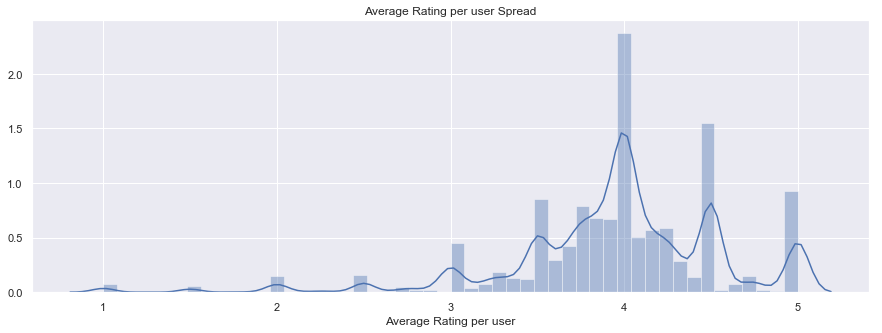

In [37]:
plt.figure(figsize = (15,5))
plt.title('Average Rating per user Spread')
sns.set()
ax = sns.distplot(user_rating.Rating_average)
ax.set(xlabel="Average Rating per user")
plt.show()

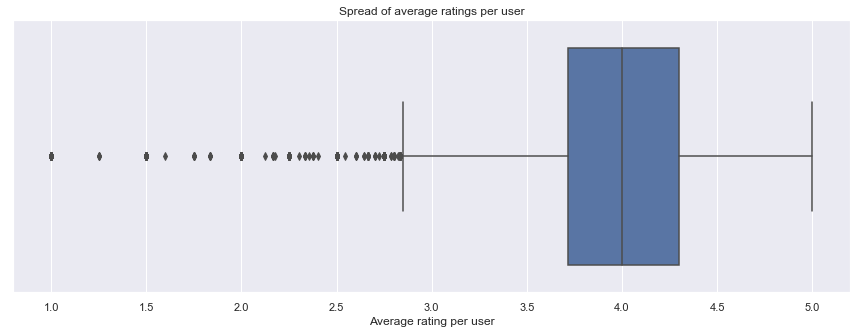

In [38]:
plt.figure(figsize = (15,5))
plt.title('Spread of average ratings per user')

ax = sns.boxplot(x=user_rating.Rating_average)
#sns.set_context("paper", font_scale=1.2)
ax.set(xlabel="Average rating per user")
plt.show()

#### <font color=red>Median and Mean value of average ratings per beer is almost same at 4</font>
#### <font color=red>Majority of users gave average rating 4 followed by 4.5 and 5 respectively</font>

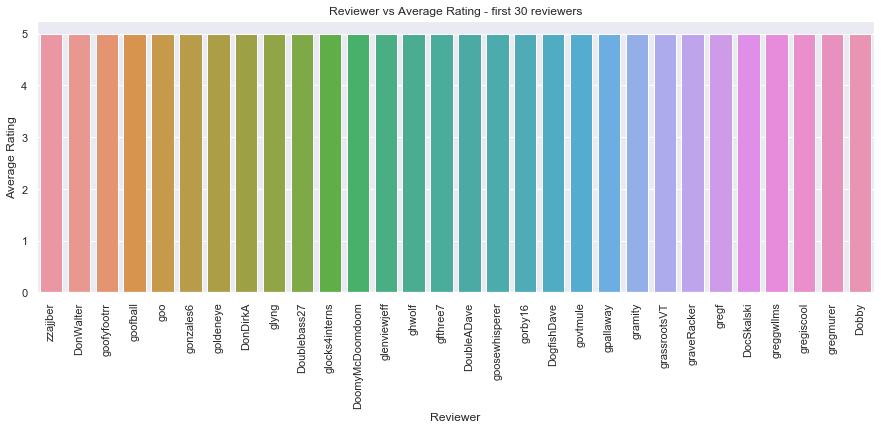

In [39]:
# average user ratings for first 30 reviewers
plt.figure(figsize = (15,5))
plt.title("Reviewer vs Average Rating - first 30 reviewers")
sns.barplot(x = 'review_profilename', y = 'Rating_average', data = user_rating.head(30))
plt.xlabel("Reviewer") 
plt.ylabel("Average Rating")
plt.xticks(rotation = 'vertical')
plt.show()

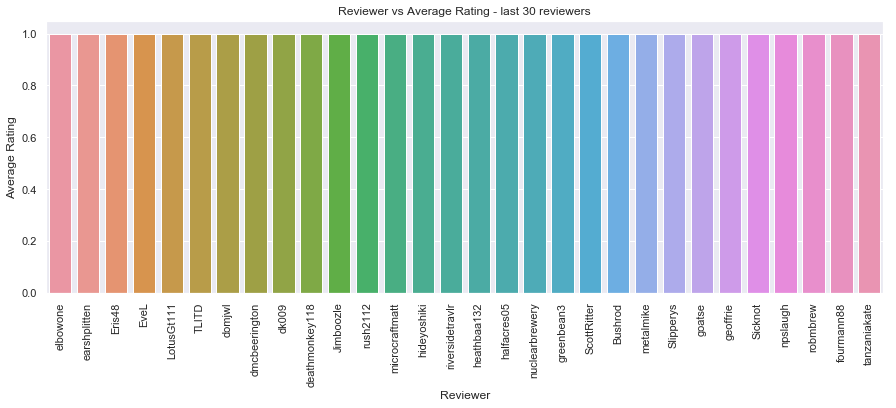

In [40]:
# average user ratings for last 30 reviewers
plt.figure(figsize = (15,5))
plt.title("Reviewer vs Average Rating - last 30 reviewers")
sns.barplot(x = 'review_profilename', y = 'Rating_average', data = user_rating.tail(30))
plt.xlabel("Reviewer") 
plt.ylabel("Average Rating")
plt.xticks(rotation = 'vertical')
plt.show()

## Average number of ratings given by user

In [41]:
user_rating.sort_values(by='Rating_count', ascending = False, inplace = True)
user_rating.Rating_count.describe()

count    19447.000000
mean        15.128143
std         36.208335
min          1.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        508.000000
Name: Rating_count, dtype: float64

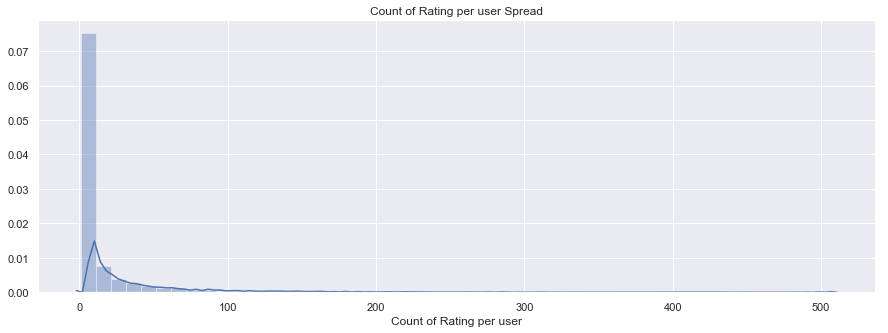

In [42]:
plt.figure(figsize = (15,5))
plt.title('Count of Rating per user Spread')
sns.set()
ax = sns.distplot(user_rating.Rating_count)
ax.set(xlabel="Count of Rating per user")
plt.show()

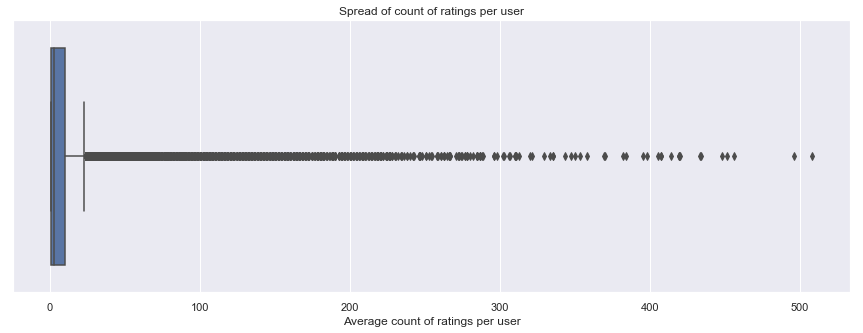

In [43]:
plt.figure(figsize = (15,5))
plt.title('Spread of count of ratings per user')

ax = sns.boxplot(x=user_rating.Rating_count)
#sns.set_context("paper", font_scale=1.2)
ax.set(xlabel="Average count of ratings per user")
plt.show()

#### <font color=red>Median and Mean value of average rating count per user vary a lot with median of 3 and mean of 15 appx.</font>
#### <font color=red>Majority of users gave number of ratings from 1 to 10, with few exceptional who gave total 508 ratings</font>

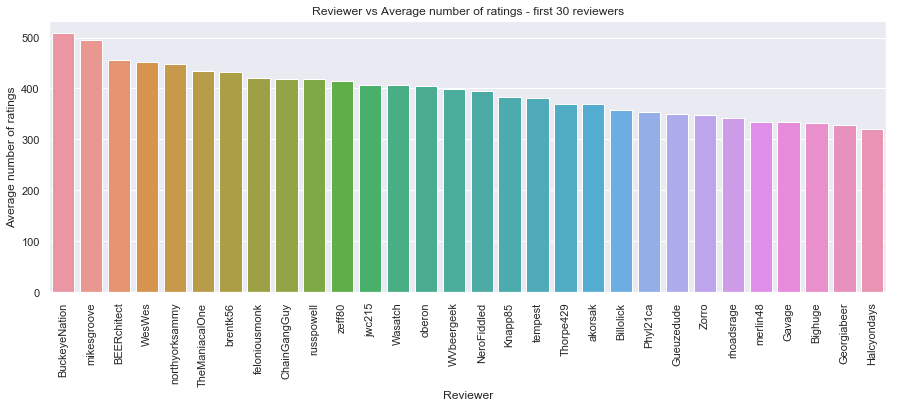

In [44]:
# average user ratings for first 30 reviewers
plt.figure(figsize = (15,5))
plt.title("Reviewer vs Average number of ratings - first 30 reviewers")
sns.barplot(x = 'review_profilename', y = 'Rating_count', data = user_rating.head(30))
plt.xlabel("Reviewer") 
plt.ylabel("Average number of ratings")
plt.xticks(rotation = 'vertical')
plt.show()

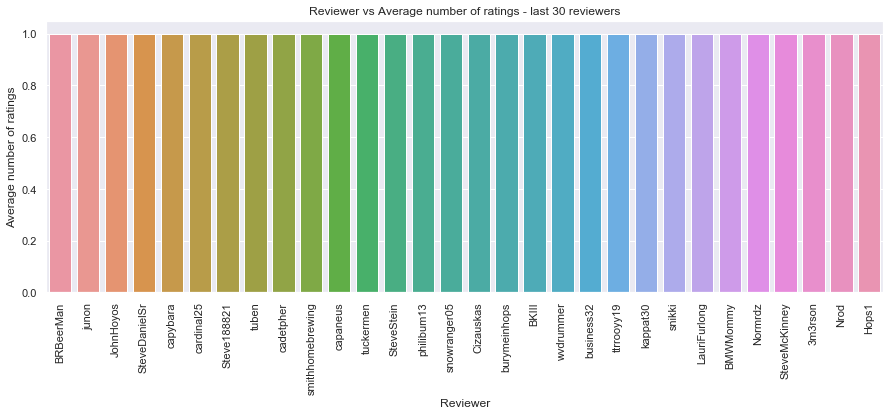

In [45]:
# average user ratings for last 30 reviewers
plt.figure(figsize = (15,5))
plt.title("Reviewer vs Average number of ratings - last 30 reviewers")
sns.barplot(x = 'review_profilename', y = 'Rating_count', data = user_rating.tail(30))
plt.xlabel("Reviewer") 
plt.ylabel("Average number of ratings")
plt.xticks(rotation = 'vertical')
plt.show()

# <font color=blue>Recommendation Models</font>

#### Splitting data into train and test, with train being at 70% and test at 30%

In [46]:
#importing library
from sklearn.model_selection import train_test_split

# performing split
train, test = train_test_split(beer_data, test_size=0.30, random_state=31)

In [47]:
print("Shape of train dataset : ",train.shape)
train.head()

Shape of train dataset :  (205937, 3)


,beer_beerid,review_profilename,review_overall
162658,5948,TheEclecticGent,4.5
217111,2961,Franchise,4.0
29063,54089,Jayli,3.0
24752,3558,terrabyte,3.5
312729,20768,darklordlager,4.0


In [48]:
print("Shape of test dataset : ",test.shape)
test.head()

Shape of test dataset :  (88260, 3)


,beer_beerid,review_profilename,review_overall
278679,2766,beerguy101,4.5
28522,30420,nrbw23,4.5
209402,6590,Kolsch,3.0
121311,12104,Deuane,4.5
70376,43341,JBON,3.0


In [49]:
# Creating pivot table for beer features
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [50]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01Ryan10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04101Brewer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Creating copy of train and test dataset for prediction and evaluation
    Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction. 
    Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [51]:
dummy_train = train.copy()
dummy_test = test.copy()

In [52]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [53]:
# The beers not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

In [54]:
# The beers not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [55]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [56]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## User Similarity Matrix

### Using Cosine Similarity

In [57]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [58]:
user_correlation.shape

(17202, 17202)

### Using adjusted Cosine
#### Not removing the NaN values and calculating the mean only for the beers rated by the user

In [59]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [60]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Normalising the rating of the movie for each user aroung 0 mean

In [61]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [62]:
df_subtracted.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [63]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### Prediction
#### Performing prediction for only positively correlated users, hence considering only positive correlation values

In [64]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

#### Rating predicted by the user (for beers that were rated or not rated) is the weighted sum of correlation with the beer rating

In [65]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[1.18210979, 2.39586718, 2.00712931, ..., 1.30620554, 2.19226756,
        1.58426839],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56729534, 5.22367115, 2.53076101, ..., 0.44452145, 0.71906464,
        2.19279431],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [66]:
user_predicted_ratings.shape

(17202, 2028)

since we are only interested in beers not rated by user hence we will ignore beers rated by user by updating it to 0

In [67]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.182110,2.395867,2.007129,2.383969,0.117704,1.158166,2.348213,1.834791,5.900556,3.069009,...,0.807601,2.263625,6.130013,0.537544,0.302546,0.470864,1.041869,1.306206,2.192268,1.584268
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.431752,4.224999,2.486638,5.221106,0.468807,1.552946,4.277244,2.620628,12.121386,4.876519,...,2.092030,2.979623,7.615892,1.598967,2.103561,2.601054,2.245057,0.755234,4.726285,2.286082
0beerguy0,0.667724,2.713345,1.434856,2.287425,1.973061,0.338014,2.287190,0.928182,2.797073,3.126014,...,0.000000,0.428374,0.762840,0.229627,0.620361,0.219960,0.062112,0.442603,0.242318,0.293490


## Item Based Similarity

#### Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different Beer ID. In the user based similarity, we had taken mean for each user intead of each beer.

In [68]:
beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1050Sudz,...,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising beer raiting for each beer

In [69]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [70]:
df_subtracted.head()

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1050Sudz,...,zuffenhausen,zuggy9,zulufactor,zwalk8,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value.

In [71]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00  8.29686245e-03  2.31720924e-03 ...  7.95984223e-05
   1.41341239e-02 -3.28010645e-03]
 [ 8.29686245e-03  1.00000000e+00  1.74066299e-03 ... -1.34282657e-02
   2.26833774e-03  4.21673842e-03]
 [ 2.31720924e-03  1.74066299e-03  1.00000000e+00 ...  0.00000000e+00
   8.66663720e-04  2.16803081e-02]
 ...
 [ 7.95984223e-05 -1.34282657e-02  0.00000000e+00 ...  1.00000000e+00
   9.49920731e-03  2.53744976e-02]
 [ 1.41341239e-02  2.26833774e-03  8.66663720e-04 ...  9.49920731e-03
   1.00000000e+00 -1.74653081e-02]
 [-3.28010645e-03  4.21673842e-03  2.16803081e-02 ...  2.53744976e-02
  -1.74653081e-02  1.00000000e+00]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [72]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.00000000e+00, 8.29686245e-03, 2.31720924e-03, ...,
        7.95984223e-05, 1.41341239e-02, 0.00000000e+00],
       [8.29686245e-03, 1.00000000e+00, 1.74066299e-03, ...,
        0.00000000e+00, 2.26833774e-03, 4.21673842e-03],
       [2.31720924e-03, 1.74066299e-03, 1.00000000e+00, ...,
        0.00000000e+00, 8.66663720e-04, 2.16803081e-02],
       ...,
       [7.95984223e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 9.49920731e-03, 2.53744976e-02],
       [1.41341239e-02, 2.26833774e-03, 8.66663720e-04, ...,
        9.49920731e-03, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.21673842e-03, 2.16803081e-02, ...,
        2.53744976e-02, 0.00000000e+00, 1.00000000e+00]])

### Prediction

In [73]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.0994061 , 0.87828887, 0.90919557, ..., 0.61956095, 0.73947902,
        0.84775993],
       [0.        , 0.        , 0.04009755, ..., 0.17084681, 0.08474766,
        0.        ],
       [0.        , 0.05553946, 0.02182215, ..., 0.        , 0.        ,
        0.10862397],
       ...,
       [0.15924966, 0.        , 0.09191914, ..., 0.04902684, 0.13055952,
        0.07705083],
       [0.00274526, 0.18399622, 0.05598312, ..., 0.        , 0.02388247,
        0.09404912],
       [0.        , 0.02822365, 0.03963099, ..., 0.        , 0.        ,
        0.        ]])

In [74]:
item_predicted_ratings.shape

(17202, 2028)

In [75]:
dummy_train.shape

(17202, 2028)

#### Filtering the rating only for the beers not rated by the user for recommendation

In [76]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.099406,0.878289,0.909196,0.593557,0.803908,0.460722,0.428624,0.204372,0.995046,0.774910,...,0.849710,0.470616,0.890109,0.609071,0.218864,0.409848,0.107322,0.619561,0.739479,0.847760
01Ryan10,0.000000,0.000000,0.040098,0.000000,0.000000,0.000000,0.064517,0.000000,0.024697,0.000000,...,0.374977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170847,0.084748,0.000000
04101Brewer,0.000000,0.055539,0.021822,0.039627,0.000000,0.000000,0.000000,0.000000,0.071548,0.183827,...,0.000000,0.000000,0.103284,0.019016,0.000000,0.000000,0.000000,0.000000,0.000000,0.108624
05Harley,0.902619,0.842791,0.851105,0.847210,0.332496,0.242188,0.565839,0.470758,0.862658,0.668880,...,0.584657,0.807530,0.889584,0.995129,0.112249,0.858225,0.527618,0.315805,0.915341,0.546106
0beerguy0,0.058605,0.292626,0.119413,0.318746,0.121850,0.282048,0.127374,0.030503,0.031454,0.133798,...,0.000000,0.000000,0.018010,0.009327,0.064900,0.020712,0.000000,0.033577,0.018466,0.049536


## Similarity between first 10 user

In [77]:
# Dataframe with first 10 users
first_10_user = user_final_rating.iloc[:10,:10]
first_10_user

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
0110x011,1.182110,2.395867,2.007129,2.383969,0.117704,1.158166,2.348213,1.834791,5.900556,3.069009
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.431752,4.224999,2.486638,5.221106,0.468807,1.552946,4.277244,2.620628,12.121386,4.876519
0beerguy0,0.667724,2.713345,1.434856,2.287425,1.973061,0.338014,2.287190,0.928182,2.797073,3.126014
0runkp0s,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0tt0,2.188771,6.958947,4.654329,8.936735,1.540477,2.962754,6.628079,4.618415,16.440132,7.653581
1000Bottles,0.502975,1.003797,2.444376,1.829410,0.334810,0.195899,0.572807,0.650343,1.942111,2.101205
100floods,0.749614,1.282038,1.346043,2.463710,0.304020,0.389872,1.576472,1.329587,5.507947,2.895747


In [78]:
# Transposing dataframe
first_10_user_T = first_10_user.transpose()
first_10_user_T

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1050Sudz
beer_beerid,,,,,,,,,,
5,1.182110,0.0,0.0,1.431752,0.667724,0.0,2.188771,0.502975,0.749614,0.0
6,2.395867,0.0,0.0,4.224999,2.713345,0.0,6.958947,1.003797,1.282038,0.0
7,2.007129,0.0,0.0,2.486638,1.434856,0.0,4.654329,2.444376,1.346043,0.0
10,2.383969,0.0,0.0,5.221106,2.287425,0.0,8.936735,1.829410,2.463710,0.0
14,0.117704,0.0,0.0,0.468807,1.973061,0.0,1.540477,0.334810,0.304020,0.0
15,1.158166,0.0,0.0,1.552946,0.338014,0.0,2.962754,0.195899,0.389872,0.0
17,2.348213,0.0,0.0,4.277244,2.287190,0.0,6.628079,0.572807,1.576472,0.0
19,1.834791,0.0,0.0,2.620628,0.928182,0.0,4.618415,0.650343,1.329587,0.0
30,5.900556,0.0,0.0,12.121386,2.797073,0.0,16.440132,1.942111,5.507947,0.0


In [79]:
# Checking correlation
first_10_user_T.corr(method ='pearson')

review_profilename,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,100floods,1050Sudz
review_profilename,,,,,,,,,,
0110x011,1.000000,NaN,NaN,0.978872,0.590910,NaN,0.969892,0.612176,0.965802,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,0.978872,NaN,NaN,1.000000,0.625102,NaN,0.993466,0.546646,0.971747,NaN
0beerguy0,0.590910,NaN,NaN,0.625102,1.000000,NaN,0.659235,0.540132,0.631650,NaN
0runkp0s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0tt0,0.969892,NaN,NaN,0.993466,0.659235,NaN,1.000000,0.593053,0.966419,NaN
1000Bottles,0.612176,NaN,NaN,0.546646,0.540132,NaN,0.593053,1.000000,0.649148,NaN
100floods,0.965802,NaN,NaN,0.971747,0.631650,NaN,0.966419,0.649148,1.000000,NaN


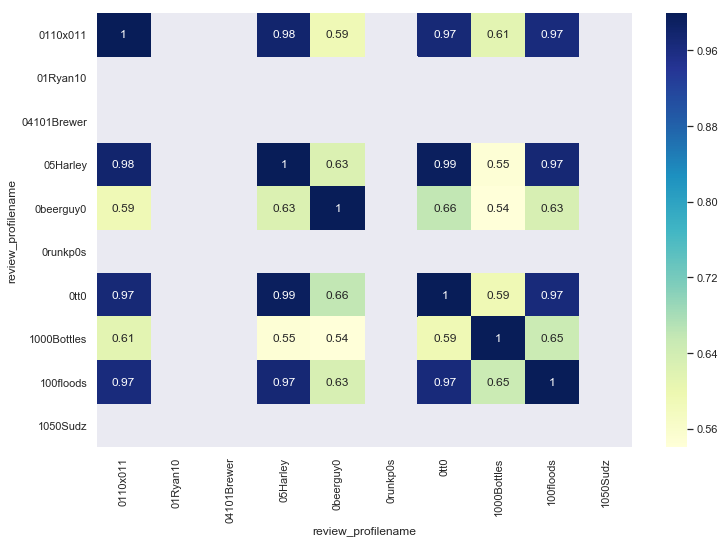

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(first_10_user_T.corr(method ='pearson'),annot=True,cmap='YlGnBu')
plt.show()

### <font color=red>We see strong correlation in few of the users while for 50% we do not see correlation it is due to the fact that both users had 0 value which resulted in No correlation defined as "NaN" here.</font>

## Similarity between the first 10 beers

In [81]:
# Dataframe with first 10 beers
first_10_beer = item_final_rating.iloc[:10,:10]
first_10_beer

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
0110x011,0.099406,0.878289,0.909196,0.593557,0.803908,0.460722,0.428624,0.204372,0.995046,0.774910
01Ryan10,0.000000,0.000000,0.040098,0.000000,0.000000,0.000000,0.064517,0.000000,0.024697,0.000000
04101Brewer,0.000000,0.055539,0.021822,0.039627,0.000000,0.000000,0.000000,0.000000,0.071548,0.183827
05Harley,0.902619,0.842791,0.851105,0.847210,0.332496,0.242188,0.565839,0.470758,0.862658,0.668880
0beerguy0,0.058605,0.292626,0.119413,0.318746,0.121850,0.282048,0.127374,0.030503,0.031454,0.133798
0runkp0s,0.000000,0.122090,0.001324,0.093598,0.011218,0.015158,0.000000,0.044668,0.038726,0.069593
0tt0,0.155176,0.103272,0.334548,0.163421,0.081049,0.193752,0.262693,0.188951,0.170384,0.384435
1000Bottles,0.067342,0.484005,0.696667,0.206264,0.110611,0.000000,0.066804,0.067274,0.154945,0.030947
100floods,0.339070,0.505422,0.628850,0.552111,0.331996,1.435242,0.379331,0.562687,1.770400,1.291808


In [82]:
# Checking correlation
first_10_beer.corr(method ='pearson')

beer_beerid,5,6,7,10,14,15,17,19,30,31
beer_beerid,,,,,,,,,,
5,1.000000,0.654214,0.627295,0.832219,0.357239,0.332634,0.823367,0.807157,0.560353,0.564800
6,0.654214,1.000000,0.938554,0.927219,0.870213,0.431345,0.828006,0.667453,0.694146,0.652606
7,0.627295,0.938554,1.000000,0.846637,0.813279,0.455887,0.824813,0.708500,0.712216,0.676182
10,0.832219,0.927219,0.846637,1.000000,0.771800,0.564577,0.931768,0.834422,0.773296,0.769955
14,0.357239,0.870213,0.813279,0.771800,1.000000,0.501767,0.768632,0.541829,0.709416,0.702990
15,0.332634,0.431345,0.455887,0.564577,0.501767,1.000000,0.566154,0.797647,0.909587,0.908445
17,0.823367,0.828006,0.824813,0.931768,0.768632,0.566154,1.000000,0.861836,0.777019,0.808456
19,0.807157,0.667453,0.708500,0.834422,0.541829,0.797647,0.861836,1.000000,0.909903,0.916070
30,0.560353,0.694146,0.712216,0.773296,0.709416,0.909587,0.777019,0.909903,1.000000,0.975917


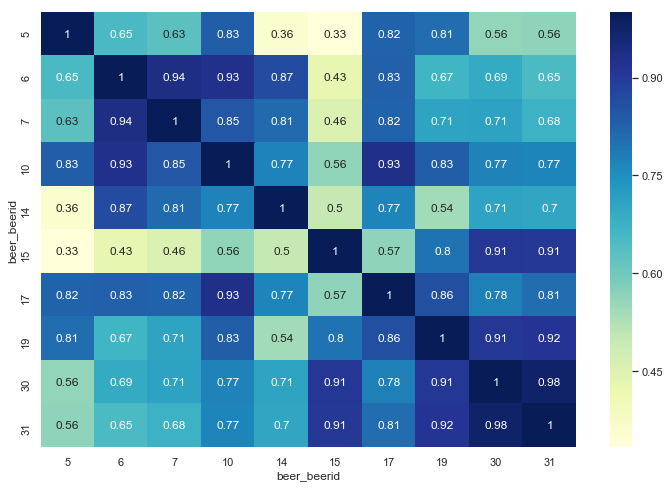

In [83]:
plt.figure(figsize=(12,8))
sns.heatmap(first_10_beer.corr(),annot=True,cmap='YlGnBu')
plt.show()

### <font color=red>We notice mixed correlation here and its all positive correlation with minimum correlation of 0.33. Few of them are highly correlated as well.</font>

## Evaluation
Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the beers already rated by the user insead of predicting it for the beer not rated by the user.

### Using User Similarity

In [84]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [85]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.25759248, 1.03114226, 0.42726579, ..., 0.16461519, 0.60528718,
        0.74483352],
       [0.17607375, 0.59829136, 0.41797999, ..., 0.71338242, 0.        ,
        0.26969114],
       [0.35672692, 0.63287196, 0.06750944, ..., 0.6041211 , 0.        ,
        0.07923394],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.53947716, 1.81844717, 0.45549682, ..., 0.00343226, 0.73337831,
        1.22483534],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Predicting the beers rated by other users

In [86]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [87]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Calculating the RMSE only for the beers rated by user. For RMSE, normalising the rating to (1,5) range.

In [88]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [89]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [90]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

#### Finding RMSE

In [91]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print("User based model rmse : ", rmse)

User based model rmse :  1.9808278247550677


### Using Item similarity

In [92]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [93]:
test_item_correlation.shape

(2028, 2028)

In [94]:
test_beer_features.shape

(2028, 12257)

In [95]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,71919,71969,72138,73131,74123,74272,74323,74390,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [97]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


#### Finding RMSE

In [98]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print("Item based model rmse : ", rmse)

Item based model rmse :  1.9325670830061021


### <font color=red>Item based model RMSE is 1.93 while User based model RMSE is 1.98, difference between the two is pretty small but we will consider model with low RMSE for deployment, hence recommendation is for Item based model for deployment.</font>

# Top 5 beer for user 'cokes'

### Using User based model

In [99]:
cokes_user_model = pd.DataFrame(user_final_rating[user_final_rating.index=='cokes']).T
cokes_user_model.sort_values(by='cokes',ascending=False)[0:5]

review_profilename,cokes
beer_beerid,
412,42.048229
1093,38.781419
1708,36.911971
4083,36.850615
34,36.494164


### Using Item based model

In [100]:
cokes_item_model = pd.DataFrame(item_final_rating[item_final_rating.index=='cokes']).T
cokes_item_model.sort_values(by='cokes',ascending=False)[0:5]

review_profilename,cokes
beer_beerid,
36179,12.054260
28268,11.488170
24905,11.420307
2219,10.555685
28267,10.515109


# Top 5 beer for user 'genog'

### Using User based model

In [101]:
genog_user_model = pd.DataFrame(user_final_rating[user_final_rating.index=='genog']).T
genog_user_model.sort_values(by='genog',ascending=False)[0:5]

review_profilename,genog
beer_beerid,
2093,33.613647
1093,32.375077
1013,29.789423
34,29.485823
92,29.386374


### Using Item based model

In [102]:
genog_item_model = pd.DataFrame(item_final_rating[item_final_rating.index=='genog']).T
genog_item_model.sort_values(by='genog',ascending=False)[0:5]

review_profilename,genog
beer_beerid,
2508,4.048396
408,3.763220
356,3.730033
7799,3.685414
646,3.651358


# Top 5 beer for user 'giblet'

### Using User based model

In [103]:
giblet_user_model = pd.DataFrame(user_final_rating[user_final_rating.index=='giblet']).T
giblet_user_model.sort_values(by='giblet',ascending=False)[0:5]

review_profilename,giblet
beer_beerid,
2093,63.411020
104,62.002390
412,61.935268
1093,56.511968
34,53.872070


### Using Item based model

In [104]:
genog_item_model = pd.DataFrame(item_final_rating[item_final_rating.index=='giblet']).T
genog_item_model.sort_values(by='giblet',ascending=False)[0:5]

review_profilename,giblet
beer_beerid,
259,4.037665
1015,3.918037
9182,3.867526
729,3.732890
782,3.609797
